In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd , sys
import matplotlib.pyplot as plt
import scikitplot as skplt
from IPython.display import clear_output
from sklearn.metrics import auc , roc_auc_score
sys.path.append("/home/advice/Python/SR/Custom/")
from RAdam import RAdamOptimizer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [202]:
data = pd.read_csv("./../Data/DontOverfit/train.csv")
test_data = pd.read_csv("./../Data/DontOverfit/test.csv")
__id__ = data.pop("id")

In [236]:
test_data.head()

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


In [203]:
target_yy = data.pop("target")
target_y = target_yy.values.reshape(-1,1)

In [204]:
target_yy.value_counts(normalize = True )

0.0    0.732
1.0    0.268
Name: target, dtype: float64

In [205]:
target_1_list = target_yy[(target_yy == 1) == True].index.tolist()
target_0_list = target_yy[(target_yy == 0) == True].index.tolist()

In [206]:
print(target_1_list)

[0, 3, 6, 17, 19, 25, 27, 28, 30, 31, 32, 34, 36, 44, 53, 54, 57, 59, 66, 68, 70, 74, 86, 88, 90, 91, 99, 100, 103, 109, 115, 117, 122, 123, 130, 138, 145, 146, 149, 154, 156, 158, 164, 166, 169, 179, 185, 187, 188, 193, 195, 196, 197, 198, 200, 203, 204, 209, 213, 218, 220, 229, 230, 232, 242, 245, 248]


In [207]:
print(target_0_list)

[1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 23, 24, 26, 29, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 58, 60, 61, 62, 63, 64, 65, 67, 69, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 89, 92, 93, 94, 95, 96, 97, 98, 101, 102, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 118, 119, 120, 121, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 147, 148, 150, 151, 152, 153, 155, 157, 159, 160, 161, 162, 163, 165, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 186, 189, 190, 191, 192, 194, 199, 201, 202, 205, 206, 207, 208, 210, 211, 212, 214, 215, 216, 217, 219, 221, 222, 223, 224, 225, 226, 227, 228, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 244, 246, 247, 249]


In [208]:
## GAN 해보기
np_data = data.values
Target0_Data = np_data[target_0_list,:]
Target1_Data = np_data[target_1_list,:]

In [209]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
MinMax = MinMaxScaler(feature_range=(0,1))
MinMax.fit(Target0_Data)
mm_Target0_Data = MinMax.transform(Target0_Data)

In [246]:
Target1_Data = np_data[target_1_list,:]
MinMax = MinMaxScaler(feature_range=(0,1))
MinMax.fit(Target1_Data)
mm_Target1_Data = MinMax.transform(Target1_Data)

In [2]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets , sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append('/home/advice/Python/SR/Custom/')
from jupyter_tensorboard import *
from utility import *
from Init import *
from Activations import *
from wasserstein import Wasserstein
from IPython.display import clear_output
import os , re
import collections
from collections import Counter
import warnings , dill
warnings.filterwarnings("ignore")
from scipy.stats import wasserstein_distance as was_dist


    사용하면 좋은 패키지
    st / train_validation_test_split / cat2dict / code2cat / colorlist / onehotencoding / roccurve  / ProbDensity
    pycm import *  
    ConfusionMatrix(actual_vector=``test_y``, predict_vector= ``pred`` ) 
    사용하면 통계량값 다 얻을 수 있음
    
1.13.1


In [252]:
def sample_data(n= None , data = None) : 
    output = data[list(np.random.choice(len(data) , n))]
    return output

data = mm_Target1_Data
input_dim = np.shape(data)[1] 
total_length = input_dim
print(input_dim)
latent_dim = 20
BATCH_SIZE = 10

300


In [253]:
def generator(Z ,  hsize=[ 50, 150 , 200],reuse=False):
    with tf.variable_scope("GAN/Generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu) 
        h2 = tf.layers.dense(h2, hsize[2] , activation = tf.nn.leaky_relu , use_bias=True )  
        out = tf.layers.dense(h2,  total_length , activation = None , use_bias= True )
        gene = tf.nn.tanh(out)
    return gene
def discriminator(X,hsize=[200, 100 , 50],reuse=True):
    with tf.variable_scope("GAN/Discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu , name = "D1")
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu , name = "D2" )
        h2 = tf.layers.dense(h2,hsize[2],activation=tf.nn.leaky_relu , name = "D3" )
        h3 = tf.layers.dense(h2,10 ,activation=tf.nn.leaky_relu , name = "D4" )
        out = tf.layers.dense(h3,1) # activation=None OUTPUT
    return out, h3

def sample_Z(m , n ):
    return np.random.uniform(-1., 1., size=[m , n])

tf.reset_default_graph()
X = tf.placeholder(tf.float32,[None, total_length  ], name= "X")
Z = tf.placeholder(tf.float32,[None,latent_dim ] , name = "Z")

In [254]:
print(total_length)

300


In [255]:
EPOCHS = 100000
data_len = np.shape(data)[0]
BATCH_SIZE = data_len
print(BATCH_SIZE)
batch_iter = int(data_len / BATCH_SIZE)
G_sample = generator(Z)
r_logits, r_rep = discriminator(X,reuse=False)
f_logits, g_rep = discriminator(G_sample,reuse=True)

67


In [256]:
BATCH_SIZE = data_len
print(BATCH_SIZE)

67


In [257]:
e = tf.random_uniform([BATCH_SIZE , 1] , 0 , 1)
x_hat =  e * X + (1-e) * G_sample
grad  = tf.gradients( discriminator(x_hat, reuse=True ), x_hat)[0]
slopes = tf.sqrt(1e-8 + tf.reduce_sum(tf.square(grad), axis=[1]))
gradient_penalty = 5 * tf.reduce_mean((slopes - 1.) ** 2)
fake_logit = (f_logits - tf.reduce_mean(r_logits))
real_logit = (r_logits - tf.reduce_mean(f_logits))
real_logit = tf.sigmoid( real_logit )
fake_logit = tf.sigmoid( fake_logit )

In [258]:
with tf.variable_scope("Discriminator_Loss") :        
    disc_loss = - tf.reduce_mean( log(real_logit)) - tf.reduce_mean( log(1-fake_logit ))
    disc_loss += gradient_penalty
with tf.variable_scope("Generator_Loss"):
    with tf.variable_scope("Original_Loss"):
        gen_loss = - tf.reduce_mean( log( fake_logit )) - tf.reduce_mean( log(1- real_logit ))
   

In [259]:
t_vars = tf.trainable_variables()
global_step = tf.get_variable('global_step', [], initializer=tf.constant_initializer(0), trainable=False)
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="GAN/Discriminator")
lr = 0.001
learning_rate = tf.train.exponential_decay(lr, global_step, decay_steps=100, decay_rate=0.98, staircase=True , )
with tf.variable_scope("Optimizer"):
    gen_step = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(gen_loss,var_list = gen_vars) # G Train step
    disc_step = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(disc_loss,var_list = disc_vars) # D Train step

In [260]:
z_batch.shape

(10000, 20)

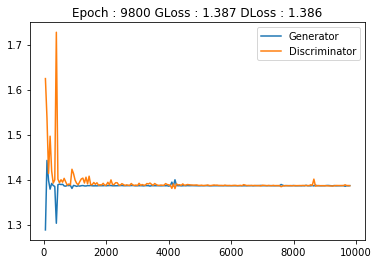

In [262]:
config=tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config= config)
init = tf.global_variables_initializer()
sess.run(init)
EPOCHS = 10000
ng_steps , nd_steps = 5, 1
print("Start")
gen_loss_store = []
disc_loss_store = []
epochs = []
for epoch in range(EPOCHS) :
    z_batch = sample_Z( len(mm_Target1_Data) ,  latent_dim)
    n_gloss = 0
    for _ in range(ng_steps):
        _, gloss = sess.run([gen_step, gen_loss], 
                            feed_dict={
                                global_step : epoch , 
                                X : mm_Target1_Data ,
                                Z : z_batch
                                      })
        n_gloss += gloss
    n_gloss /= ng_steps
    n_dloss = 0
    for _ in range(nd_steps):
        _, dloss  = sess.run([disc_step, disc_loss] , 
                             feed_dict={
                                 global_step : epoch ,
                                 X : mm_Target1_Data ,
                                 Z : z_batch
                                       })
        n_dloss += dloss
    n_gloss /= nd_steps
    if (epoch % 50 == 0) & (epoch > 0) :
        epochs.append(epoch)
        gen_loss_store.append(n_gloss)
        disc_loss_store.append(n_dloss)
    if (epoch % 200 == 0) & (epoch > 0) :
        clear_output()
        plt.plot( epochs , gen_loss_store , label = "Generator")
        plt.plot( epochs, disc_loss_store , label = "Discriminator")
        plt.title( "Epoch : {} GLoss : {:.3f} DLoss : {:.3f}".format(epoch ,n_gloss , n_dloss  ))
        #plt.ylim(0,3)
        plt.legend()
        plt.show()

In [263]:
z_batch = sample_Z( 10000 ,  latent_dim)
Target1Generated = sess.run(G_sample , feed_dict={  Z : z_batch })

In [264]:
InvTarget1Generated = pd.DataFrame(MinMax.inverse_transform(Target1Generated))

In [265]:
InvTarget1Generated["target"] = 1

In [266]:
InvTarget0Generated.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,target
0,0.739139,1.023033,0.968323,-0.496825,1.215805,0.724370,-1.759084,-0.391147,-0.845689,-0.762771,...,1.129821,-0.858527,-0.718167,-0.691992,0.099934,0.897582,0.120119,1.938232,-1.350434,0
1,0.792419,0.781270,1.182858,-0.416829,1.329277,0.469441,-1.920939,-1.084474,-0.323681,-0.624752,...,1.224329,-0.269320,-0.428129,-0.498206,0.125666,1.057244,0.463130,1.976383,-1.173487,0
2,1.212256,0.711025,1.457136,0.234205,1.331007,-0.154095,-2.098547,-0.630169,-0.095591,-0.357032,...,1.268399,-0.197785,-0.410510,-0.342091,0.316464,1.260014,0.483248,2.032042,-1.425422,0
3,1.241740,0.918282,1.159631,-0.044632,1.346310,0.249457,-2.283180,-1.022553,-0.552471,-0.237919,...,0.825035,0.570639,-1.385445,-0.061153,-0.170904,1.035243,0.124421,1.654203,-1.096530,0
4,0.841202,0.684148,0.757026,-0.577127,0.991795,0.132018,-2.350511,-1.096153,-0.525150,-0.974777,...,0.888344,-0.637942,-0.646260,-0.896758,-0.447584,0.694951,0.085596,1.552694,-1.304661,0


In [267]:
InvTarget0Generated.to_csv("DontOvefitTarget1.csv",index = False)

## 앙상블 테스트

In [10]:
select = ['243', '29', '35', '299', '219', '32', '59', '133', '150', '127', '103', '199', '78', '77', '74', '23', '267', '264', '14', '152', '177', '54', '215', '93', '52', '162', '176', '76', '220', '159', '297', '94', '185', '140', '115', '108', '95', '198', '34', '130', '137', '240', '18', '49', '141', '260', '17', '50', '161', '104', '57', '63', '214', '56', '62', '201', '53', '48', '80', '277', '247', '261', '258', '287', '119', '284', '12', '100', '135', '33', '273', '167', '225', '279', '216', '292', '75', '69', '268', '276', '90', '223', '106', '281', '92', '112', '3', '128', '111', '20', '250', '192', '269', '60', '190', '84', '205', '251', '91', '270', '191', '136', '160', '182', '68', '180', '99', '290', '66', '79', '25', '11', '142', '8', '27', '193', '282', '30', '202', '7', '203', '31', '58', '253', '43', '244', '246', '126', '224', '262', '121', '172', '125', '265', '0']
#sample_dim = np.random.permutation(data.shape[1])[:200]
# [select]
np_data = data.values
# np_data = StandardScaler().fit_transform(np_data)

In [11]:
row , dim = np_data.shape
print(row,dim)

250 300


In [19]:
enc_dim = [dim  , 200 , 150  , 30]
dec_dim = [30 , 50, 100 , dim]
tf.reset_default_graph()
X = tf.placeholder(tf.float32 , [None , dim])
i = 0
W_encode = tf.Variable(tf.random_normal(enc_dim[i:(i+2)]))
b_encode = tf.Variable(tf.random_normal([enc_dim[i+1]]))
EncLayer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode) , name = "Encoder")
i = 1
W_encode = tf.Variable(tf.random_normal(enc_dim[i:(i+2)]))
b_encode = tf.Variable(tf.random_normal([enc_dim[i+1]]))
EncLayer2 = tf.nn.sigmoid(tf.add(tf.matmul(EncLayer1, W_encode), b_encode) , name = "Encoder")
i = 2
W_encode = tf.Variable(tf.random_normal(enc_dim[i:(i+2)]))
b_encode = tf.Variable(tf.random_normal([enc_dim[i+1]]))
Code = tf.nn.sigmoid(tf.add(tf.matmul(EncLayer2, W_encode), b_encode) , name = "Code")
i = 0
W_decode = tf.Variable(tf.random_normal(dec_dim[i:(i+2)]))
b_decode = tf.Variable(tf.random_normal([dec_dim[i+1]]))
DecLayer1 = tf.nn.sigmoid(tf.add(tf.matmul(Code, W_decode), b_decode) , name = "Decoder")
i = 1
W_decode = tf.Variable(tf.random_normal(dec_dim[i:(i+2)]))
b_decode = tf.Variable(tf.random_normal([dec_dim[i+1]]))
DecLayer2 = tf.nn.sigmoid(tf.add(tf.matmul(DecLayer1, W_decode), b_decode) , name = "Decoder")
i = 2
W_decode = tf.Variable(tf.random_normal(dec_dim[i:(i+2)]))
b_decode = tf.Variable(tf.random_normal([dec_dim[i+1]]))
Decoder =  tf.add(tf.matmul(DecLayer2, W_decode), b_decode,  name = "Final")
learning_rate = 0.001
batch_size = 50
training_epoch = 10000
cost = tf.reduce_mean(tf.pow(X - Decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_count = int( row / batch_size)
loss = []
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(batch_count):
        batch_xs = np_data[i*(batch_count) : (i+1)*(batch_count) ,:]
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs})
        total_cost += cost_val
    loss.append(total_cost / batch_count)
    if epoch % 100 == 0 :
        print('Epoch:', '%04d' % (epoch + 1),
              'Avg. cost =', '{:.4f}'.format(total_cost / batch_count))

Epoch: 0001 Avg. cost = 39.8634
Epoch: 0101 Avg. cost = 0.9875
Epoch: 0201 Avg. cost = 0.9256
Epoch: 0301 Avg. cost = 0.8504
Epoch: 0401 Avg. cost = 0.7597
Epoch: 0501 Avg. cost = 0.6606
Epoch: 0601 Avg. cost = 0.5659
Epoch: 0701 Avg. cost = 0.4749
Epoch: 0801 Avg. cost = 0.3967
Epoch: 0901 Avg. cost = 0.3264
Epoch: 1001 Avg. cost = 0.2642
Epoch: 1101 Avg. cost = 0.2109
Epoch: 1201 Avg. cost = 0.1660
Epoch: 1301 Avg. cost = 0.1273
Epoch: 1401 Avg. cost = 0.0968
Epoch: 1501 Avg. cost = 0.0672
Epoch: 1601 Avg. cost = 0.0490
Epoch: 1701 Avg. cost = 0.0353
Epoch: 1801 Avg. cost = 0.0222
Epoch: 1901 Avg. cost = 0.0118
Epoch: 2001 Avg. cost = 0.0118
Epoch: 2101 Avg. cost = 0.0067
Epoch: 2201 Avg. cost = 0.0061
Epoch: 2301 Avg. cost = 0.0069
Epoch: 2401 Avg. cost = 0.0069
Epoch: 2501 Avg. cost = 0.0076
Epoch: 2601 Avg. cost = 0.0059
Epoch: 2701 Avg. cost = 0.0061
Epoch: 2801 Avg. cost = 0.0064
Epoch: 2901 Avg. cost = 0.0059
Epoch: 3001 Avg. cost = 0.0063
Epoch: 3101 Avg. cost = 0.0052
Epoch: 

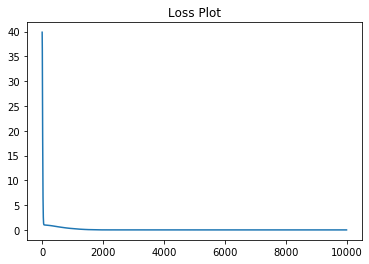

In [20]:
plt.plot( np.arange(len(loss)) , loss )
plt.title("Loss Plot")
plt.show()

In [21]:
__test_id__ = test_data.pop("id")

In [22]:
tr_NEW_Variable = sess.run(Code, feed_dict={X: np_data})
# [select]
np_test = test_data.values
te_NEW_Variable = sess.run(Code, feed_dict={X: np_test})

In [23]:
np_data = np.concatenate([np_data ,tr_NEW_Variable ] ,axis = 1)
np_test = np.concatenate([np_test ,te_NEW_Variable ] ,axis = 1)

#####

In [440]:
from tensorflow.contrib.layers import *

data = pd.read_csv("./../Data/DontOverfit/train.csv")
test_data = pd.read_csv("./../Data/DontOverfit/test.csv")
__id__ = data.pop("id")

In [441]:
target0_data = pd.read_csv("./DontOvefitTarget0.csv").sample(400)
target1_data = pd.read_csv("./DontOvefitTarget1.csv").sample(400)

In [442]:
target1_data["target"] = 1

In [443]:
gan_data = pd.concat([target0_data , target1_data])

In [444]:
target_yy = data.pop("target")
gan_target_yy = gan_data.pop("target")
data = pd.concat([data , gan_data]).reset_index(drop=True)
target_yy = pd.concat([target_yy ,gan_target_yy ]).reset_index(drop=True)
target_y = target_yy.values.reshape(-1,1)

In [445]:
target_1_list = target_yy[(target_yy == 1) == True].index.tolist()
target_0_list = target_yy[(target_yy == 0) == True].index.tolist()

In [446]:
np_data = data.values

In [447]:
row , dim = np_data.shape
print(row,dim)
target_n = 2 
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape = [ None , dim])
y = tf.placeholder(tf.float32, shape = [ None , 1])
DropoutRate = tf.placeholder(tf.float32, name ="dropoutRate")
training = tf.placeholder_with_default(False, shape=[], name="training")

1050 300


In [448]:
def tf_mish(x) :
    return x * tf.nn.tanh(tf.nn.softplus(x))
activate_candidate = \
[tf.nn.selu, tf_mish , tf.nn.leaky_relu , tf.nn.elu ]

In [449]:
def Classifier(X , hidden = [dim , 250,150,100,50,10 , target_n], 
               Nensemble = 3 ) :
    Ensembles = []
    with tf.variable_scope("Ensembles"):
        for N in np.arange(Nensemble) :
            SELECT = np.random.randint(0 , len(activate_candidate) , 1)[0]
            activation = activate_candidate[SELECT]
            hidden_N = hidden[N]
            for idx in np.arange(len( hidden_N )-1) : 
                hid = hidden_N[idx]
                if (idx+1) < len(hidden_N) :
                    w = (variance_scaling_initializer(uniform=False,
                                                      factor=2.0, mode='FAN_IN', dtype=tf.float32)
                         ((hid ,hidden_N[idx+1])))
                    W = tf.Variable(w, name = "Weight")
                    Bias = tf.Variable(tf.random_normal([hidden_N[idx+1]], stddev = 0.01))
                    if idx == 0 :
                        dropX = tf.nn.dropout(X , keep_prob = 1 , 
                                              seed = N + 1234 )
                        Layer = activation(tf.matmul(dropX , W) + Bias)
                        #Layer = tf.contrib.nn.alpha_dropout(Layer , DropoutRate ) 
                    else :
                        if target_n == hidden_N[idx+1] :
                            Layer = tf.matmul(Layer , W) + Bias
                        else :
                            Layer = tf.matmul(Layer , W) + Bias
                            Layer = tf.layers.batch_normalization(Layer,
                                                                  training= training ,
                                                                  momentum = 0.999)
                            Layer = activation(Layer)
#                             Layer = tf.contrib.nn.alpha_dropout(Layer , DropoutRate ) 
                else : pass
            Ensembles.append(Layer)
        #Input = tf.concat(Ensembles, axis=1, name='Inputs')
    return Ensembles


In [450]:
HIDDEN = [
    [dim , 200 , 150 , 10 ,  target_n] , 
    [dim , 180 , 125, target_n] ,
    [dim , 170 , 55, target_n] ,
    [dim , 150 , 100 , 30 , target_n] ,
    [dim , 30 , 10, target_n]
         ]
NModels = Classifier(X , hidden = HIDDEN , Nensemble= 3 )
NModels_MEAN = tf.reduce_mean(NModels , axis = 0)
Probs = tf.nn.softmax(NModels_MEAN)
y_one_hot = tf.one_hot( tf.cast(tf.squeeze(y , axis = 1 ) , tf.int32) , depth=2)

In [451]:
from sklearn.utils.class_weight import compute_class_weight
y_weight_info = compute_class_weight(class_weight= "balanced" , 
                     classes = np.unique(target_y),
                     y= np.squeeze(target_y))
weight = tf.constant([ y_weight_info[1] ] ) # 

## Version1 (Averaging)

In [452]:
WCE = tf.nn.weighted_cross_entropy_with_logits(targets = y_one_hot ,
                                               logits = NModels_MEAN , 
                                               pos_weight =  weight)
Loss = tf.reduce_mean(WCE)

## Version2 (개별)

In [453]:
mod = sys.modules[__name__]
# for i in range(10):
#     setattr(mod, 'var_{}'.format(i), i)
Loss = 0
for idx , Model in enumerate(NModels) :
    loss = tf.nn.weighted_cross_entropy_with_logits(targets = y_one_hot ,
                                                     logits = Model , 
                                                     pos_weight = weight)
    setattr(mod, 'model_{}_softmax'.format(idx), 
            tf.argmax( tf.nn.softmax(Model) , axis = 1 ))
    Loss += tf.reduce_mean(loss)
Loss /= len(NModels)

In [454]:
vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="Ensembles")
L2 = []
WEIGHTS = []
import re 
for v in vars :
    if re.search('Weight' , v.name) :
        WEIGHTS.append(v)
        L2.append(tf.nn.l2_loss(v))
Loss += tf.add_n(L2)  * 0.1
l1_regularizer = tf.contrib.layers.l1_regularizer(scale=0.005, scope=None)
regularization_penalty = tf.contrib.layers.apply_regularization(l1_regularizer, WEIGHTS )
Loss += regularization_penalty

In [455]:
solver = RAdamOptimizer(learning_rate= 1e-4).minimize(Loss ,var_list = vars )

In [456]:
np_data.shape 

(1050, 300)

In [457]:
len(target_1_list) , len(target_0_list) , len(np_data)

(467, 583, 1050)

In [ ]:
set(target_1_list) & set(target_0_list)

set()

```
target1 = np.random.choice(target_1_list ,
                           mb_size , replace = False )
target0 = np.random.choice(target_0_list , 
                           mb_size , replace = False )
target1 = list(target1)
target0 = list(target0)
XX = np_data[target1 + target0  , : ]
YY = target_y[target1 + target0 , : ]
shuffle_idx = np.random.permutation(len(XX))
XXX = XX[shuffle_idx , : ]
YYY = YY[shuffle_idx , : ]
```

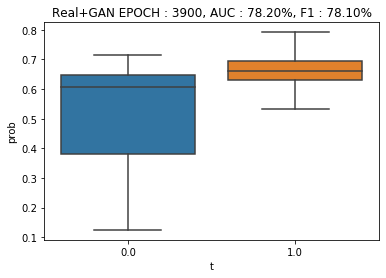

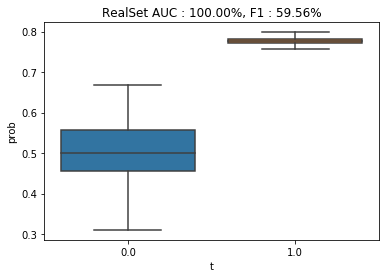

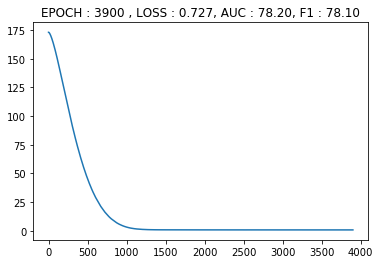

In [ ]:
from sklearn.metrics import confusion_matrix , f1_score
Epoch = 4000
mb_size = 300
batch_iter = int(len(np_data)/mb_size)
config=tf.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)
sess.run(tf.global_variables_initializer())
_Loss_ = []
print("Train")
for epoch in range(Epoch) :
    batch_iter = int(len(np_data) / mb_size)
    loss_v2 = []
    AUC_v2 = []
    F1_v2 = []
    for idx in range(batch_iter) :
        target1 = np.random.choice(target_1_list ,
                                   int(0.55*mb_size) , replace = False )
        target0 = np.random.choice(target_0_list , 
                                   int(0.45*mb_size) , replace = False )
        target1 = list(target1)
        target0 = list(target0)
        if epoch > 0 :
            target1 = target1 + BoostingList * 2
        XX = np_data[target1 + target0  , : ]
        YY = target_y[target1 + target0 , : ]
        shuffle_idx = np.random.permutation(len(XX))
        X_mb = XX[shuffle_idx , : ]
        Y_mb = YY[shuffle_idx , : ]
        Feed = {X : X_mb ,
                y : Y_mb , 
                DropoutRate : 0.5 ,
                training : True 
               }
        _ , LOSS  = sess.run([solver , Loss] , feed_dict= Feed)
        loss_v2.append(LOSS)
        probs  = sess.run(Probs , feed_dict= Feed)
        pred = np.argmax(probs , axis = 1 ) 
        AUC = roc_auc_score(np.squeeze(Y_mb) , probs[:,1])
        f1score = f1_score(np.squeeze(Y_mb) ,  pred)
        AUC_v2.append(AUC)
        F1_v2.append(f1score)
    AUC_Score = np.mean(AUC_v2)
    F1 = np.mean(F1_v2)
    LOSS = np.mean(loss_v2)
    _Loss_.append(LOSS)
    
    
    Feed = { X : np_data  ,
            DropoutRate : 1 ,
            training : True 
           }
    probs  = sess.run(Probs , feed_dict= Feed)
    DD = pd.DataFrame([np.squeeze(target_y) ,
                       np.argmax(probs,axis =1)], index = ["t","p"]).T
    DD2 = DD[(DD.t == 1) & (DD.p==0)]
    BoostingList = DD2.index.tolist()
#     DD = pd.DataFrame([np.squeeze(target_y) ,probs[:,1]],
#                       index = ["t","prob"]).T
#     if epoch % 100 == 0 :
#         dd = [sess.run( getattr(mod,  "model_{}_softmax".format(i)) , 
#                        feed_dict= Feed)  for i in np.arange(len(NModels))]
# #         a,b,c = sess.run([model_0_softmax ,
# #                           model_1_softmax ,
# #                           model_2_softmax] , feed_dict= Feed)
#         d = pd.DataFrame(dd).sum(axis = 0)
#         plt.scatter( np.arange(len(d)) , d.values)
#         plt.show()
#         print( confusion_matrix(np.squeeze(target_y) , 
#                                 np.argmax(probs,axis =1) ))
#         msg = "Epoch : {} , Loss :{:.5f}, AUC : {:.2f}".format(epoch ,
#                                                                  LOSS ,
#                                                                  AUC*100)
#         print(msg)
    
    
    if (epoch % 50 == 0) & (epoch > 0) :
        clear_output()
        DD = pd.DataFrame([np.squeeze(target_y) , np.round(probs[:,1],4) ],
                          index = ["t","prob"]).T
        sns.boxplot(x="t", y="prob", data=DD , showfliers = False )
        msg = "Real+GAN EPOCH : {}, AUC : {:.2f}%, F1 : {:.2f}%".\
        format(epoch , AUC_Score*100 , F1*100)
        plt.title(msg)
        plt.show()
        real_idx = np.arange(0,250).tolist()
        RealX = np_data[real_idx  , : ]
        RealY = target_y[real_idx, : ]
        Feed = { X : RealX  ,
                DropoutRate : 1 ,
                training : True 
               }
        probs  = sess.run(Probs , feed_dict= Feed)
        DD = pd.DataFrame([np.squeeze(RealY) , np.round(probs[:,1],4)] , 
                          index = ["t","prob"]).T
        sns.boxplot(x="t", y="prob", data=DD , showfliers = False )
        pred = np.argmax(probs , axis = 1 ) 
        AUC = roc_auc_score(np.squeeze(RealY) , probs[:,1])
        f1score = f1_score(np.squeeze(RealY) ,  pred)
        msg = "RealSet AUC : {:.2f}%, F1 : {:.2f}%".\
        format(AUC*100 ,f1score*100)
        plt.title(msg)
        plt.show()
        
        plt.plot(np.arange(len(_Loss_)), _Loss_ )
        msg = "EPOCH : {} , LOSS : {:.3f}, AUC : {:.2f}, F1 : {:.2f}".\
        format(epoch , LOSS , AUC_Score*100 , F1*100)
        plt.title(msg)
        plt.show()

In [432]:
test_data = pd.read_csv("./../Data/DontOverfit/test.csv")
__test_id__ = test_data.pop("id")
np_test = test_data.values

In [433]:
np_test.shape

(19750, 300)

In [434]:

Feed = { X : np_test  ,
            DropoutRate : 1 ,
            training : True 
           }
probs  = sess.run(Probs , feed_dict= Feed)

In [435]:
probs.shape

(19750, 2)

In [474]:
submission = pd.DataFrame(__test_id__)
submission["target"] = probs[:,1] #np.argmax( , axis = 1)

In [475]:
submission.to_csv("dontovefit_submission_gan.csv", index = False)

In [476]:
submission.head()

,id,target
0,250,0.784326
1,251,0.496695
2,252,0.543942
3,253,0.374842
4,254,0.719719


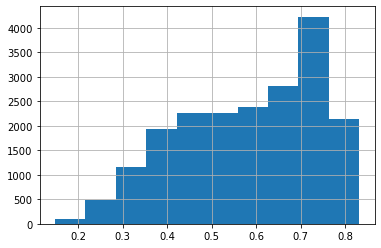

In [477]:
submission.target.hist()

## 변수 중요도를 이용한 변수 선택 및 AutoEncoder로 파생 변수 넣어보기 

## gradient boosting 알고리즘 참고해보기..

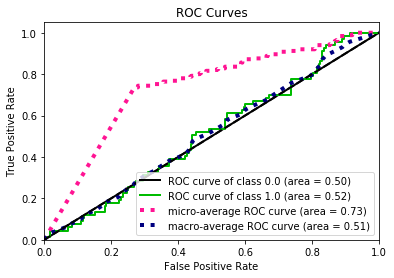

In [29]:
skplt.metrics.plot_roc(np.squeeze(target_y),
                       probs)
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


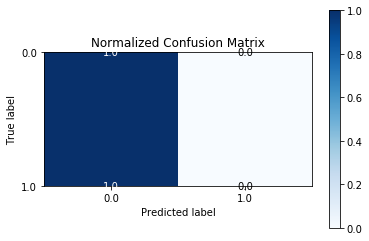

In [35]:
pred  = np.argmax(probs , axis =1 )
skplt.metrics.plot_confusion_matrix(np.squeeze(target_y), 
                                    pred,
                                    normalize=True)
plt.show()

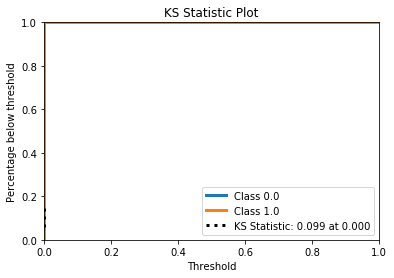

In [37]:
skplt.metrics.plot_ks_statistic(np.squeeze(target_y),
                                probs )
plt.show()